In [71]:
from milliontrees.common.data_loaders import get_train_loader

from milliontrees.datasets.TreePolygons import TreePolygonsDataset
import pandas as pd

In [66]:
import os
import cv2

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [65]:
from shapely import wkt
import numpy as np
from PIL import Image, ImageDraw

In [3]:
## polygons

dataPolygons = TreePolygonsDataset(download=True,mini=True)

#training 
trainPolygons = dataPolygons.get_subset("train")
train_loaderPolygons = get_train_loader("standard", trainPolygons, batch_size=2)

  0%|                | 129564672/106085316699 [00:09<2:04:47, 14151611.73Byte/s]


Extracting data/TreePolygons_v0.10/archive.zip to data/TreePolygons_v0.10

It took 0.16 minutes to download and uncompress the dataset.



In [ ]:
from shapely import wkt
import numpy as np
from PIL import Image

In [26]:
# csv loading 
split_path = os.path.join("data", "TreePolygons_v0.10", "random.csv")
split_df = pd.read_csv(split_path)
    
print("Number of rows in split:", len(split_df))

Number of rows in split: 6175


In [40]:
pd.DataFrame(split_df.columns)

0
0       Unnamed: 0
1       pixelvalue
2            Class
3            Field
4       Shape_Leng
5       Shape_Area
6       NEWSPECIES
7         OneClass
8             Code
9         geometry
10        filename
11           label
12      Newspecies
13          source
14  existing_split
15    Unnamed: 0.1
16           Label
17           split
18           fid_1
19            Site
20     GroundValid
21           Crown
22            Area
23              Id
24      Classvalue
25       Classcode
26       Classname
27             RED
28           GREEN
29            BLUE
30           Count
31      SHAPE_Leng
32      SHAPE_Area
33              id
34            id_2
35      scientific
36      class_code
37        taxon_id
38  Urban_Class_ID
39     Urban_Class
40       Street_ID
41      individual
42      indiviudal
43       indiviual
44        complete
45         polygon

In [41]:
split_df.head()

Unnamed: 0  pixelvalue Class  Field  Shape_Leng  Shape_Area  NEWSPECIES  \
0       237.0         0.0    AM    0.0    6.988297    2.785392         NaN   
1       238.0         0.0    AM    0.0    6.307216    2.243685         NaN   
2       209.0         0.0    AM    0.0    3.945989    1.099880         NaN   
3       210.0         0.0    AM    0.0    4.183740    1.082917         NaN   
4       235.0         0.0    AM    0.0    6.641302    1.917673         NaN   

  OneClass   Code                                           geometry  ...  \
0     tree  ACMIM  POLYGON ((326.610526 509.021053, 327.831579 56...  ...   
1     tree  ACMIM  POLYGON ((477.178947 518.810526, 535.936842 59...  ...   
2     tree  ACMIM  POLYGON ((743.963158 567.026316, 724.310526 55...  ...   
3     tree  ACMIM  POLYGON ((823.273684 618.963158, 833.8 591.589...  ...   
4     tree  ACMIM  POLYGON ((307.021053 652.242105, 363.331579 67...  ...   

  class_code taxon_id  Urban_Class_ID Urban_Class Street_ID  individual  \
0        NaN      NaN             NaN         NaN       NaN         NaN   
1        NaN      NaN             NaN         NaN       NaN         NaN   
2        NaN      NaN             NaN         NaN       NaN         NaN   
3        NaN      NaN             NaN         NaN       NaN         NaN   
4        NaN      NaN             NaN         NaN       NaN         NaN   

  indiviudal indiviual  complete  \
0        NaN       NaN      True   
1        NaN       NaN      True   
2        NaN       NaN      True   
3        NaN       NaN      True   
4        NaN       NaN      True   

                                             polygon  
0  POLYGON ((326.610526 509.021053, 327.831579 56...  
1  POLYGON ((477.178947 518.810526, 535.936842 59...  
2  POLYGON ((743.963158 567.026316, 724.310526 55...  
3  POLYGON ((823.273684 618.963158, 833.8 591.589...  
4  POLYGON ((307.021053 652.242105, 363.331579 67...  

[5 rows x 46 columns]

In [45]:
train_rows = split_df[split_df["split"] == "train"]
print("nb lignes train: ",len(train_rows))

nb lignes train:  1426


In [54]:
import random

random_index = random.randint(0, len(train_rows) - 1)
row = train_rows.iloc[random_index]

print("Index choisi:", random_index)
print(row)

Index choisi: 91
Unnamed: 0                                                      NaN
pixelvalue                                                      NaN
Class                                                           NaN
Field                                                           NaN
Shape_Leng                                                      NaN
Shape_Area                                                      NaN
NEWSPECIES                                                      NaN
OneClass                                                        NaN
Code                                                            NaN
geometry          POLYGON ((81 1239.5, 43 1238.5, 33 1235.5, 10....
filename                                       Stadtwald_31_389.tif
label                                                           NaN
Newspecies                                                      NaN
source                                           Troles et al. 2024
existing_split                 

In [55]:
#first row 

#row = train_rows.iloc[0]

#print("Selected row:")
#print(row)

In [56]:
# filename and geometry
image_filename = row["filename"]
geom_wkt = row["geometry"]  #POLYGON ((x y, x y,...)

In [57]:
# outputs
images_dir = os.path.join("data", "TreePolygons_v0.10", "images")
image_path = os.path.join(images_dir, image_filename)

print("Image path:", image_path)
assert os.path.exists(image_path), f"Image not found: {image_path}"

Image path: data/TreePolygons_v0.10/images/Stadtwald_31_389.tif


In [58]:
# load img
img = np.array(Image.open(image_path).convert("RGB"))
# parse polygon with wkt
geom = wkt.loads(geom_wkt) # return a shapely obj ( a polygon)
x, y = geom.exterior.coords.xy
x = np.array(x)
y = np.array(y)


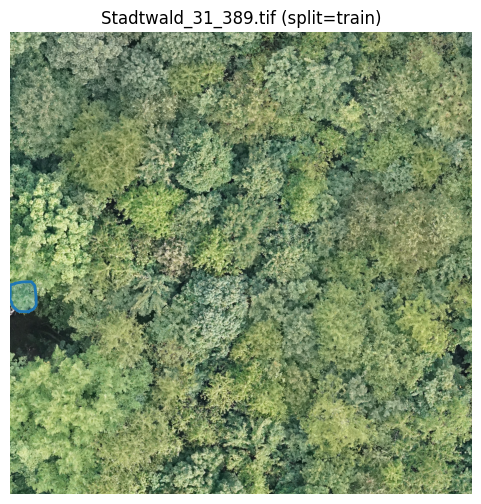

In [59]:
# plot 1 polygon
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)

ax.plot(x, y, linewidth=2)
# ax.fill(x, y, alpha=0.25)

ax.set_title(f"{image_filename} (split={row['split']})")
ax.axis("off")
plt.show()

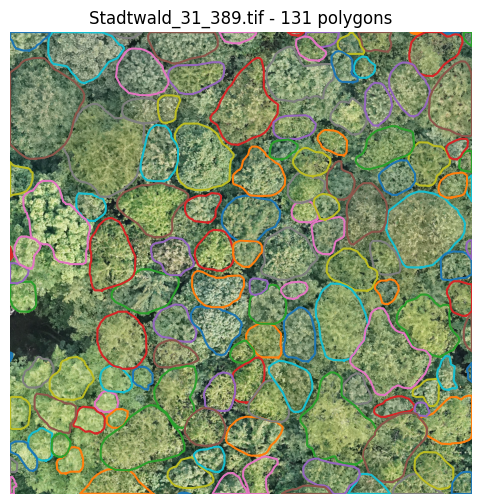

In [61]:
# all polygon detected ?
same = split_df[split_df["filename"] == image_filename]

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img)

for _, r in same.iterrows():
    geom = wkt.loads(r["geometry"])
    x, y = geom.exterior.coords.xy
    ax.plot(x, y, linewidth=1.5)
    #ax.fill(x, y, alpha=0.15)

ax.set_title(f"{image_filename} - {len(same)} polygons")
ax.axis("off")
plt.show()


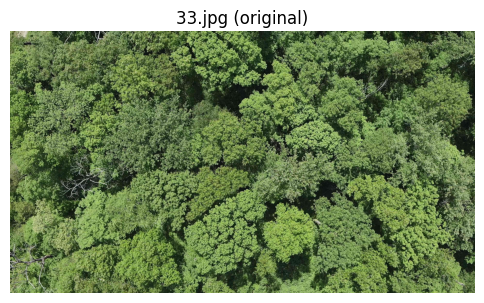

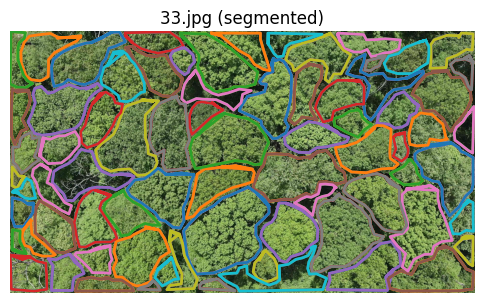

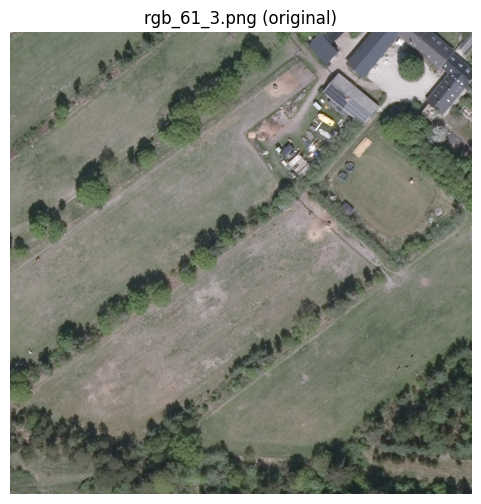

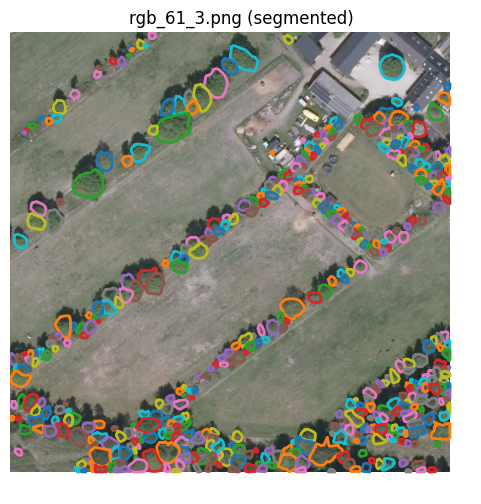

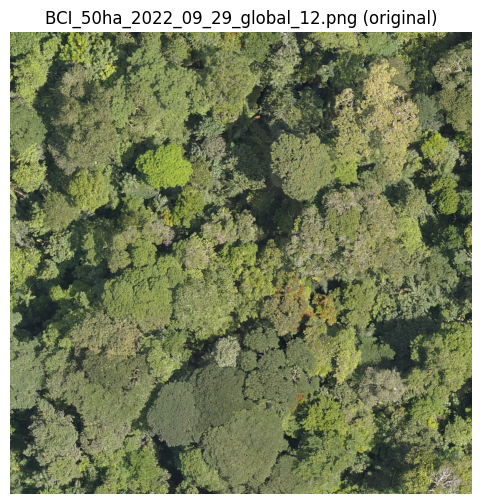

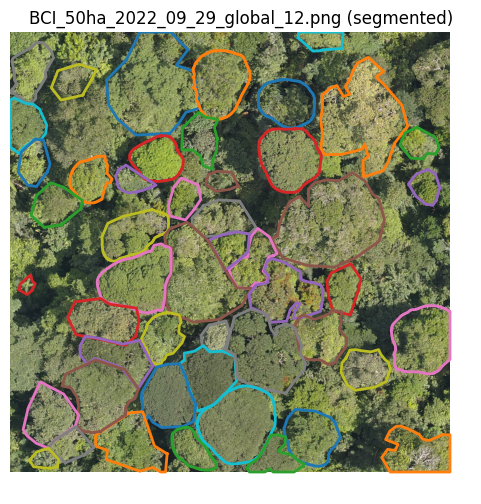

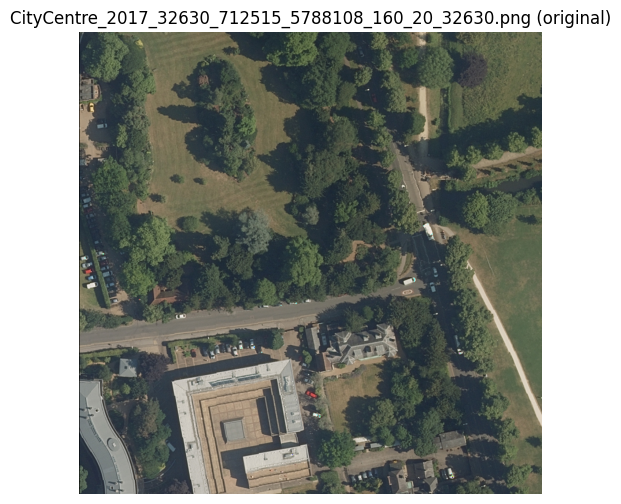

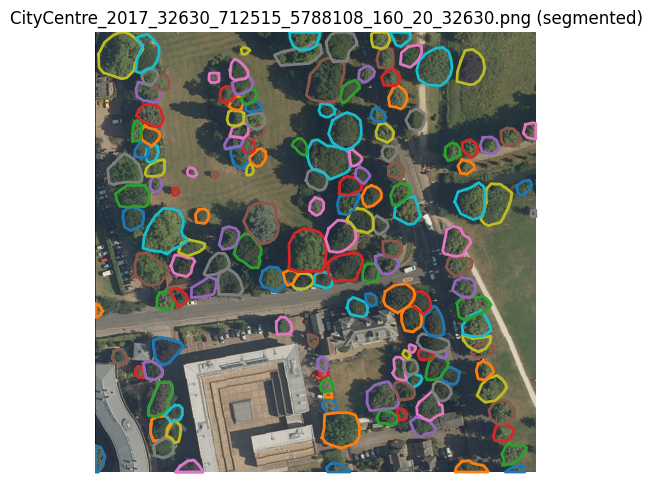

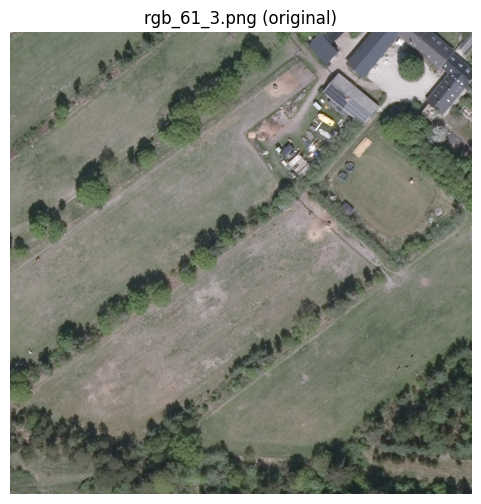

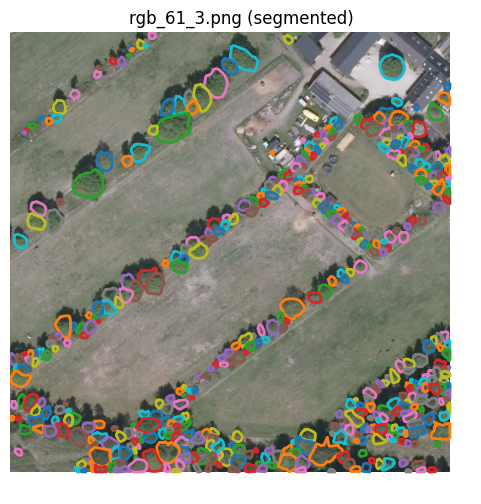

In [64]:
n = 5

for i in range(n):

    random_index = random.randint(0, len(train_rows) - 1)
    row = train_rows.iloc[random_index]
    image_filename = row["filename"]
    same = train_rows[train_rows["filename"] == image_filename]

    image_path = os.path.join(images_dir, image_filename)
    assert os.path.exists(image_path), f"Image not found: {image_path}"
    img = np.array(Image.open(image_path).convert("RGB"))

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)
    ax.set_title(f"{image_filename} (original)")
    ax.axis("off")
    plt.show()

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)

    for _, r in same.iterrows():
        geom_wkt = r["geometry"]
        geom = wkt.loads(geom_wkt)
        x, y = geom.exterior.coords.xy
        x = np.array(x)
        y = np.array(y)
        ax.plot(x, y, linewidth=2)

    ax.set_title(f"{image_filename} (segmented)")
    ax.axis("off")
    plt.show()


In [ ]:
# CNN

In [93]:
metadata, image, target = trainPolygons[1]
y = target["y"] # annoatations ground truth

print("type:", type(y))

if hasattr(y, "shape"):
    print("shape:", y.shape)

if hasattr(y, "dtype"):
    print("dtype:", y.dtype)

if hasattr(y, "device"):
    print("device:", y.device)

if hasattr(y, "detach"):
    y_np = y.detach().cpu().numpy()
else:
    y_np = np.asarray(y)

print("numpy shape:", y_np.shape)
print("numpy dtype:", y_np.dtype)

print("min:", y_np.min())
print("max:", y_np.max())

print("unique values (first 20):", np.unique(y_np)[:20])


type: <class 'torch.Tensor'>
shape: torch.Size([131, 448, 448])
dtype: torch.uint8
device: cpu
numpy shape: (131, 448, 448)
numpy dtype: uint8
min: 0
max: 255
unique values (first 20): [  0 255]


In [ ]:
#shape: torch.Size([131, 448, 448])
# (nb ab, puis taille img ie 448,488)
# 2 vals : O (ab) ou 255(fond)(si fond ou pas)
# differents mask pour differnets ab de l'image

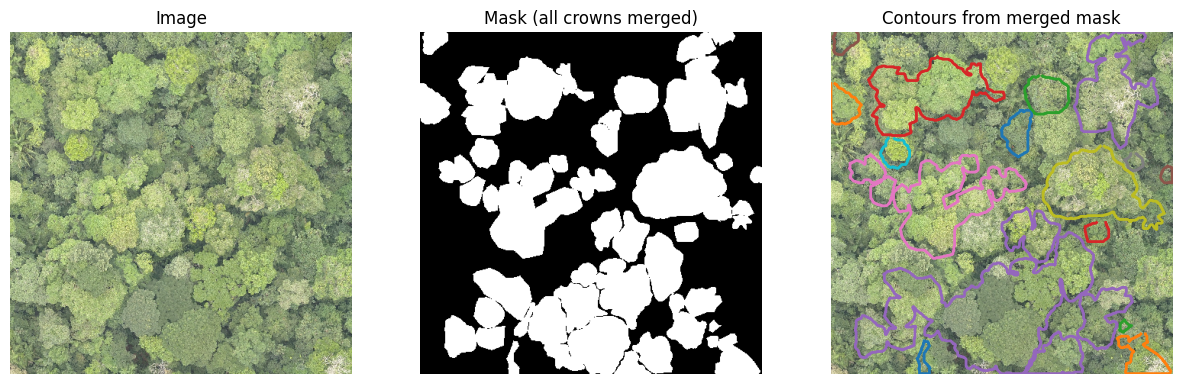

In [92]:
metadata, image, target = trainPolygons[5]
# pytorch : (C, H, W)
# plot : (H, W, C) donc permuter :
img = image.permute(1, 2, 0).numpy()

masks = target["y"].numpy()  #ex :(59,448,448) uint8 0/255
mask_all = masks.max(axis=0).astype(np.uint8)  # (448,448), fusions all masks of an img
contours, _ = cv2.findContours(mask_all, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img)
ax[0].set_title("Image")
ax[0].axis("off")
ax[1].imshow(mask_all, cmap="gray")
ax[1].set_title("Mask (all crowns merged)")
ax[1].axis("off")

ax[2].imshow(img)
ax[2].set_title("Contours from merged mask")
ax[2].axis("off")
for cnt in contours:
    cnt = cnt.squeeze(1)
    if cnt.ndim != 2 or len(cnt) < 3:
        continue
    ax[2].plot(cnt[:, 0], cnt[:, 1], linewidth=2)

plt.show()


In [ ]:
# But pour le CNN : generer mask , 
# apprendre le mask pour tâche de segmentation dans milliontrees

In [110]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from milliontrees.datasets.TreePolygons import TreePolygonsDataset
